# Theano 패키지 소개

Theano 패키지는 GPU를 지원하는 선형 대수 심볼 컴파일러(Symbolic Linear Algebra Compiler)이다.

심볼 컴파일러란 수치적인 미분, 선형 대수 계산 뿐 아니라 symbolic expression을 통해 정의된 수식(주로 목적 함수)을 사람처럼 미분하거나 재정리하여 전체 계산에 대한 최적의 계산 경로를 찾아내는 소프트웨어를 말한다. 수치 미분을 사용한 연산에 비해 정확도나 속도가 빠르기 때문에 대용량 선형 대수 계산이나 몬테카를로 시뮬레이션, 또는 딥 러닝에 사용된다.

Theano 패키지의 또다른 특징은 GPU와 CPU에 대해 동일한 파이썬 코드를 사용할 수 있다는 점이다. 아래는 GPU를 사용한 Theano 연산 결과를 비교한 것이다.

<img src="http://deeplearning.net/software/theano/_images/mlp.png">

## GPGPU 

GPU는 GPGPU(General-Purpose computing on Graphics Processing Units: 범용 그래픽 연산 유니트)를 줄어서 쓰는 말이다. 

그래픽 작업은 다음 그림에서 보듯 상당한 병렬 연산을 필요로 하기 때문에 일반 CPU와 달리 성능이 낮은 다수의 코어를 동시에 사용할 수 있는 구조를 가지고 있다. 이러한 구조는 단순한 계산을 반복해야 하는 몬테카를로 시뮬레이션이나 딥 러닝에서 상당한 효과를 볼 수 있다.

<img src="http://cdn.iopscience.com/images/1742-5468/2009/06/P06016/Full/1354202.jpg">


<img src="http://bioinfo-fr.net/wp-content/uploads/2012/02/cpugpu_1.png"> 

## CUDA vs OpenCL

GPU는 기본 구조가 일반적인 CPU와 다르기 때문에 저수준 명령어 체계가 다르므로 별도의 플랫폼과 라이브러리가 필요하다. 현재 많이 사용되는 GPU 연산용 플랫폼에는 nvidia 계열의 CUDA와 Apple, AMD, Intel 계열의 OpenCL 이 있다.

파이썬에서는 pyCUDA 패키지와 pyOpenCL 패키지를 사용할 수 있다.

## Theano 기본 사용법

다음은 Theano를 사용하는데 도움이 되는 참조 문서 목록이다.

 * http://ir.hit.edu.cn/~jguo/docs/notes/a_simple_tutorial_on_theano.pdf
 * http://mlg.eng.cam.ac.uk/yarin/PDFs/RCC-Auto-Diff-presentation.pdf
 * http://speech.ee.ntu.edu.tw/~tlkagk/courses/MLDS_2015_2/Lecture/Theano%20DNN.pdf
 

Theano를 사용하기 위해서는 다음과 같은 과정을 거쳐야 한다. 

1. 심볼 변수 정의
2. 심볼 관계 정의
3. 심볼 함수 정의
4. 심볼 함수 사용


### 심볼 변수 정의

Theano의 모든 변수는 심볼 변수이므로 수치 변수와 혼동이 되지 않게 별도로 정의해야 한다. 

스칼라, 벡터, 행렬을 정의하기 위해 `theano.tensor.T` 서브패키지의 `dscalar`, `dvector`, `dmatrix` 명령을 사용하거나 이미 심볼로 정의된 변수의 연산을 통해 자동으로 정의된다.

In [1]:
import theano
import theano.tensor as T
from theano import function

In [2]:
x = T.dscalar('x')
y = T.dscalar('y')

In [3]:
type(x), type(y)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

### 심볼 관계 정의

이미 만들어진 심볼 변수에 일반 사칙연산이나 Theano 수학 함수를 사용하여 종속 변수 역할을 하는 심볼 변수를 만들 수 있다.

In [4]:
z = x + y

In [5]:
type(z)

theano.tensor.var.TensorVariable

In [6]:
u = T.exp(z)

In [7]:
type(u)

theano.tensor.var.TensorVariable

### 심볼 프린트

Theano의 심볼 변수의 내용을 살펴보기 위해서는 `theano.printing.pprint` 명령 또는 `theano.printing.pydotprint` 을 사용한다.

In [8]:
theano.printing.pprint(x)

'x'

In [9]:
theano.printing.pprint(y)

'y'

In [10]:
theano.printing.pprint(z)

'(x + y)'

In [11]:
theano.printing.pprint(u)

'exp((x + y))'

In [12]:
from IPython.display import SVG

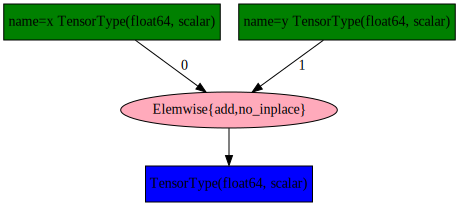

In [13]:
SVG(theano.printing.pydotprint(z, return_image=True, format='svg'))

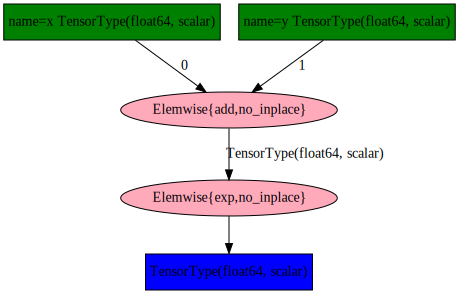

In [14]:
SVG(theano.printing.pydotprint(u, return_image=True, format='svg'))

### 심볼 함수

심볼 함수는 `theano.function` 명령으로 정의하며 입력 심볼 변수와 출력 심볼 변수를 지정한다. 출력 심볼 변수는 입력 심볼 변수의 연산으로 정의되어 있어야 한다. 

처음 심볼 함수를 정의할 때는 내부적으로 컴파일을 하기 때문에 시간이 다소 걸릴 수 있다.

In [15]:
%time f = theano.function(inputs=[x, y], outputs=z)

CPU times: user 230 ms, sys: 180 ms, total: 410 ms
Wall time: 2.99 s


함수의 값을 계산하려면 일반 함수와 같이 사용하면 된다.

In [16]:
f(1, 2)

array(3.0)

벡터와 행렬도 마찬가지 방법으로 사용한다.

In [17]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')
z2 = x2 + y2
f2 = function([x2, y2], z2)
f2([1, 2], [3, 4])

array([ 4.,  6.])

In [18]:
x3 = T.dmatrix('x3')
y3= T.dmatrix('y3')
z3 = x3 + y3
f3 = function([x3, y3], z3)
f3([[1], [2]], [[3], [4]])

array([[ 4.],
       [ 6.]])

로지스틱 함수나 난수를 사용하는 함수는 다음과 같이 정의한다.

In [19]:
s = 1 / (1 + T.exp(-x))
logistic = function([x], s)
logistic(1)

array(0.7310585786300049)

In [20]:
s2 = 1 / (1 + T.exp(-x2))
logistic2 = function([x2], s2)
logistic2([0, 1])

array([ 0.5       ,  0.73105858])

함수에서 디폴트 인수는 다음과 같이 `In` 명령을 사용해서 정의한다.

In [21]:
from theano import In

x, y = T.dscalars('x', 'y')
z = x + y
f = theano.function([x, In(y, value=2)], z)
f(1)

array(3.0)

난수 발생도 theano 의 `RandomStreams` 명령을 사용해야 한다.

In [22]:
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams()
rv_u = srng.uniform((1,2))
rv_n = srng.normal((1,2))

f = function([], rv_u)
g = function([], rv_n, no_default_updates=True)    #Not updating rv_n.rng

In [23]:
f(), f(), f(), f()

(array([[ 0.61292887,  0.32125888]]),
 array([[ 0.98054401,  0.1652169 ]]),
 array([[ 0.5691799 ,  0.88201232]]),
 array([[ 0.35836905,  0.86968623]]))

In [24]:
g(), g(), g(), g()

(array([[-0.09061278, -1.50726085]]),
 array([[-0.09061278, -1.50726085]]),
 array([[-0.09061278, -1.50726085]]),
 array([[-0.09061278, -1.50726085]]))

### shared memory

상태값을 저장할 때는 shared memory 를 사용할 수 있다. shared memory는 GPU 내부 메모리를 사용하므로 연산 속도가 향상된다.
상태값을 변경하기 위해서는 함수에 `updates` 라는 콜백(callback)을 정의해야 한다. `givens` 라는 콜백을 정의하면 함수내에서 출력까지 한번에 정의할 수도 있다.

* givens: 함수 실행 전에 계산되는 값
* updates: 함수 실행 후에 계산되는 값

shared memory 에 저장된 값은 `get_value` 메서드로 읽는다.

In [25]:
state = theano.shared(0)
inc = T.iscalar('inc')
out = T.iscalar('out')
accumulator = function(inputs=[inc], outputs=out, givens={out: inc * 2}, updates={state: state + inc})

In [26]:
accumulator(1)

array(2, dtype=int32)

In [27]:
state.get_value()

array(1)

In [28]:
accumulator(2)

array(4, dtype=int32)

In [29]:
state.get_value()

array(3)

In [30]:
accumulator(5)

array(10, dtype=int32)

In [31]:
state.get_value()

array(8)

### 최적화

Theano는 함수 계산을 위한 최적화를 지원한다. 예를 들어 다음과 같은 함수는 제곱 연산을 사용하여 최적화 할 수 있다.

In [32]:
x = T.vector('x')
y = x ** 10
f = theano.function([x], y)

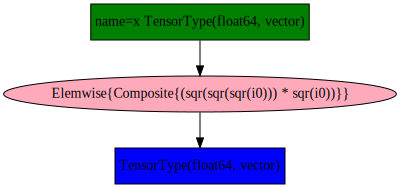

In [33]:
SVG(theano.printing.pydotprint(f, return_image=True, format='svg'))

함수 실행 속도를 비교해 보면 다음과 같다.

In [34]:
x = np.ones(10000000)

In [35]:
%timeit x ** 10

1 loop, best of 3: 305 ms per loop


In [36]:
%timeit f(x)

100 loops, best of 3: 13.4 ms per loop


### 미분 

심볼릭 연산의 가장 큰 장점은 빠르고 정확하게 미분값(gradient, Hessian 등)을 계산할 수 있다는 점이다.

In [37]:
x = T.dscalar('x')
y = x ** 2
gy = T.grad(y, x)
fy = theano.function([x], y)
fgy = theano.function([x], gy)

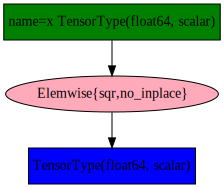

In [38]:
SVG(theano.printing.pydotprint(fy.maker.fgraph.outputs[0], return_image=True, format='svg'))

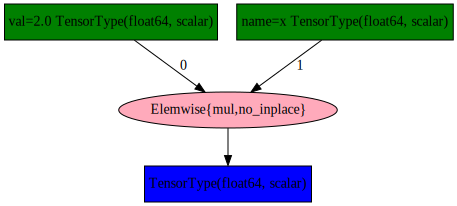

In [39]:
SVG(theano.printing.pydotprint(fgy.maker.fgraph.outputs[0], return_image=True, format='svg'))

In [40]:
x = T.dscalar('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)
gs = T.grad(s, x)
dlogistic = theano.function([x], gs)

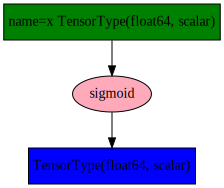

In [41]:
SVG(theano.printing.pydotprint(logistic, return_image=True, format='svg'))

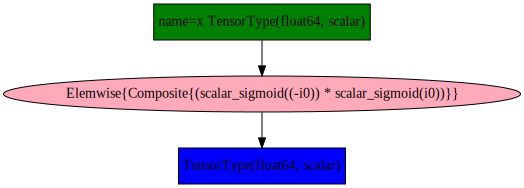

In [42]:
SVG(theano.printing.pydotprint(dlogistic.maker.fgraph.outputs[0], return_image=True, format='svg'))

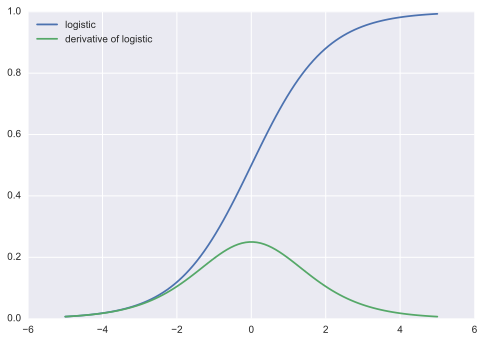

In [43]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label="logistic")
plt.plot(xx, y2, label="derivative of logistic")
plt.legend(loc=0)
plt.show()

## 퍼셉트론 구현

Theano를 사용하면 다음과 같이 퍼셉트론을 구현할 수 있다. 여기에서는 퍼셉트론 오차 함수가 아닌 오차제곱합 오차 함수를 사용하였다.

우선 입력, 가중치, 상수항을 각각 `x`, `w`, `b` 로 정의하고 출력 함수를 `f`로 정의한다.

In [44]:
x = T.dvector('x')
w = theano.shared(np.zeros(2))
b = theano.shared(0.0)
z = T.dot(w, x) + b
a = 1/(1  + T.exp(-z))
f = function([x], a)

출력을 `y`, 목적 함수를 `cost`, 목적 함수의 미분(그레디언트)을 `gradient`로 정의한다.

In [45]:
y = T.dscalar('y')
cost = T.sum((y - a)**2)
gw, gb = T.grad(cost, [w, b])
gradient = function([x, y], [gw, gb])

초기값에서 그레디언트 값을 계산하고 이를 이용하여 가중치를 갱신한다.

In [46]:
eta = 0.1
xi = [1, -1]
yi = 1

gradient = theano.function([x, y], updates=[(w, w - eta * gw), (b, b - eta * gb)])
gradient(xi, yi)
w.get_value(), b.get_value()

(array([ 0.025, -0.025]), array(0.025))

## 멀티 클래스 로지스틱 회귀 구현

Theano를 사용하여 로지스틱 회귀를 구현하면 다음과 같다. 다음 웹사이트를 참조하였다.

* http://deeplearning.net/tutorial/logreg.html



이 모형은 Softmax 함수를 사용하여 멀티 클래스 출력을 구현하였다.


$$
\begin{eqnarray}
 P(Y=i \mid x, W,b) &= \text{softmax}_i(W x + b) = \frac {e^{W_i x + b_i}} {\sum_j e^{W_j x + b_j}}
\end{eqnarray}               
$$



$$
\begin{eqnarray}
y_{pred} = {\rm argmax}_i P(Y=i \mid  x,W,b)
\end{eqnarray}               
$$


In [47]:
class LogisticRegression(object):
    """Multi-class Logistic Regression Class

    The logistic regression is fully described by a weight matrix :math:`W`
    and bias vector :math:`b`. Classification is done by projecting data
    points onto a set of hyperplanes, the distance to which is used to
    determine a class membership probability.
    """

    def __init__(self, input, n_in, n_out):
        """ Initialize the parameters of the logistic regression

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes 
                      the input of the architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space 
                     in which the datapoints lie

        :type n_out: int
        :param n_out: number of output units, the dimension of the space 
                      in which the labels lie

        """
        # initialize with 0 the weights W as a matrix of shape (n_in, n_out)
        self.W = theano.shared(value=np.zeros((n_in, n_out), dtype=theano.config.floatX), 
                               name='W', borrow=True)
        
        # initialize the biases b as a vector of n_out 0s
        self.b = theano.shared(value=np.zeros((n_out,), dtype=theano.config.floatX), 
                               name='b', borrow=True)

        # symbolic expression for computing the matrix of class-membership probabilities 
        # Where: 
        # W is a matrix where column-k represent the separation hyperplane for class-k
        # x is a matrix where row-j  represents input training sample-j
        # b is a vector where element-k represent the free parameter of hyperplane-k
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

        # symbolic description of how to compute prediction as class 
        # whose probability is maximal
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)

        # parameters of the model
        self.params = [self.W, self.b]

        # keep track of model input
        self.input = input

    def negative_log_likelihood(self, y):
        """Return the mean of the negative log-likelihood of the prediction of this model 
        under a given target distribution.

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example 
                  the correct label

        Note: we use the mean instead of the sum so that  the learning rate 
              is less dependent on the batch size
        """
        # y.shape[0] is (symbolically) the number of rows in y, 
        # i.e., number of examples (call it n) in the minibatch
        # T.arange(y.shape[0]) is a symbolic vector 
        # which will contain [0,1,2,... n-1] 
        # T.log(self.p_y_given_x) is a matrix of Log-Probabilities 
        # (call it LP) with one row per example and one column per class 
        # LP[T.arange(y.shape[0]),y] is a vector v containing 
        # [LP[0,y[0]], LP[1,y[1]], LP[2,y[2]], ...,
        # LP[n-1,y[n-1]]] and T.mean(LP[T.arange(y.shape[0]),y]) 
        # is the mean (across minibatch examples) of the elements in v,
        # i.e., the mean log-likelihood across the minibatch.
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])

    def errors(self, y):
        """Return a float representing the number of errors 
        in the minibatch over the total number of examples of the minibatch ; 
        zero one loss over the size of the minibatch

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example 
                  the correct label
        """

        # check if y has same dimension of y_pred
        if y.ndim != self.y_pred.ndim:
            raise TypeError('y should have the same shape as self.y_pred', 
                            ('y', y.type, 'y_pred', self.y_pred.type))
        # check if y is of the correct datatype
        if y.dtype.startswith('int'):
            # the T.neq operator returns a vector of 0s and 1s, 
            # where 1 represents a mistake in prediction
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()

이 모형의 가중치를 찾기 위한 SGD 알고리즘은 다음과 같이 구현한다.

In [48]:
import timeit

def sgd_optimization_mnist(learning_rate=0.13, n_epochs=1000, 
                           dataset='mnist.pkl.gz', batch_size=600):
    """
    Demonstrate stochastic gradient descent optimization of a log-linear model
    This is demonstrated on MNIST.

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic gradient)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: the path of the MNIST dataset file from
                    http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz

    """
    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] // batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] // batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch

    # generate symbolic variables for input (x and y represent a minibatch)
    x = T.matrix('x')  # data, presented as rasterized images
    y = T.ivector('y')  # labels, presented as 1D vector of [int] labels

    # construct the logistic regression class
    # Each MNIST image has size 28*28
    classifier = LogisticRegression(input=x, n_in=28 * 28, n_out=10)

    # the cost we minimize during training is the negative log likelihood of the model 
    # in symbolic format
    cost = classifier.negative_log_likelihood(y)

    # compiling a Theano function that computes the mistakes that are made by the model 
    # on a minibatch
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    # compute the gradient of cost with respect to theta = (W,b)
    g_W = T.grad(cost=cost, wrt=classifier.W)
    g_b = T.grad(cost=cost, wrt=classifier.b)

    # start-snippet-3
    # specify how to update the parameters of the model as a list of
    # (variable, update expression) pairs.
    updates = [(classifier.W, classifier.W - learning_rate * g_W),
               (classifier.b, classifier.b - learning_rate * g_b)]

    # compiling a Theano function `train_model` that returns the cost, but in
    # the same time updates the parameter of the model based on the rules 
    # defined in `updates`
    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-3

    ###############
    # TRAIN MODEL #
    ###############
    print('... training the model')
    # early-stopping parameters
    patience = 5000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer 
                           # when a new best is found
    improvement_threshold = 0.995  # a relative improvement of this much 
                                   # is considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many minibatche 
                                  # before checking the network
                                  # on the validation set; 
                                  # in this case we check every epoch

    best_validation_loss = np.inf
    test_score = 0.
    start_time = timeit.default_timer()

    done_looping = False
    epoch = 0
    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):
            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) \
                                     for i in range(n_valid_batches)]
                this_validation_loss = np.mean(validation_losses)

                print(
                    'epoch %2i, minibatch %i/%i, validation error %12.4f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:
                    #improve patience if loss improvement is good enough
                    if this_validation_loss < \
                       best_validation_loss * improvement_threshold:
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    # test it on the test set

                    test_losses = [test_model(i) for i in range(n_test_batches)]
                    test_score = np.mean(test_losses)

                    # save the best model
                    with open('best_model.pkl', 'wb') as f:
                        pickle.dump(classifier, f)

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print(
        (
            'Optimization complete with best validation score of %f %%,'
            'with test performance %f %%'
        )
        % (best_validation_loss * 100., test_score * 100.)
    )
    print('The code run for %d epochs, with %f epochs/sec' % \
          (epoch, 1. * epoch / (end_time - start_time)))

In [49]:
import six.moves.cPickle as pickle
import gzip
import os
import sys

def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)
    '''

    #############
    # LOAD DATA #
    #############

    # Download the MNIST dataset if it is not present
    data_dir, data_file = os.path.split(dataset)
    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        from six.moves import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('... loading data')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a np.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # np.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.

    def shared_dataset(data_xy, borrow=True):
        """ Function that loads the dataset into shared variables

        The reason we store our dataset in shared variables is to allow
        Theano to copy it into the GPU memory (when code is run on GPU).
        Since copying data into the GPU is slow, copying a minibatch everytime
        is needed (the default behaviour if the data is not in a shared
        variable) would lead to a large decrease in performance.
        """
        data_x, data_y = data_xy
        shared_x = theano.shared(np.asarray(data_x, 
                                            dtype=theano.config.floatX), 
                                 borrow=borrow)
        shared_y = theano.shared(np.asarray(data_y, 
                                            dtype=theano.config.floatX), 
                                 borrow=borrow)
        # When storing data on the GPU it has to be stored as floats
        # therefore we will store the labels as ``floatX`` as well
        # (``shared_y`` does exactly that). But during our computations
        # we need them as ints (we use labels as index, and if they are
        # floats it doesn't make sense) therefore instead of returning
        # ``shared_y`` we will have to cast it to int. This little hack
        # lets ous get around this issue
        return shared_x, T.cast(shared_y, 'int32')

    test_set_x, test_set_y = shared_dataset(test_set)
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    rval = [(train_set_x, train_set_y), 
            (valid_set_x, valid_set_y), 
            (test_set_x, test_set_y)]
    return rval


In [50]:
%time sgd_optimization_mnist()

... loading data
... building the model
... training the model
epoch  1, minibatch 83/83, validation error      12.4583 %
epoch  2, minibatch 83/83, validation error      11.0104 %
epoch  3, minibatch 83/83, validation error      10.3125 %
epoch  4, minibatch 83/83, validation error       9.8750 %
epoch  5, minibatch 83/83, validation error       9.5625 %
epoch  6, minibatch 83/83, validation error       9.3229 %
epoch  7, minibatch 83/83, validation error       9.1875 %
epoch  8, minibatch 83/83, validation error       8.9896 %
epoch  9, minibatch 83/83, validation error       8.9375 %
epoch 10, minibatch 83/83, validation error       8.7500 %
epoch 11, minibatch 83/83, validation error       8.6667 %
epoch 12, minibatch 83/83, validation error       8.5833 %
epoch 13, minibatch 83/83, validation error       8.4896 %
epoch 14, minibatch 83/83, validation error       8.4271 %
epoch 15, minibatch 83/83, validation error       8.3542 %
epoch 16, minibatch 83/83, validation error       8.